[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Sno.    Company        Type  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                             Content  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why do I pay for WORD when it funct...  
3  CSGO matchmaking is so full of closet hacking,...  
4  Now the President is slapping Americans in the...  
Index(['Sno.', 'Company', 'Type', 'Content'], dtype='object')
   Sno.    Company        Type  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                             Content  \
0  I mentioned on Facebook that I was struggling ...   
1  BBC News - Amazon boss Jeff Bezos rejects clai...   
2  @Microsoft Why do I pay for

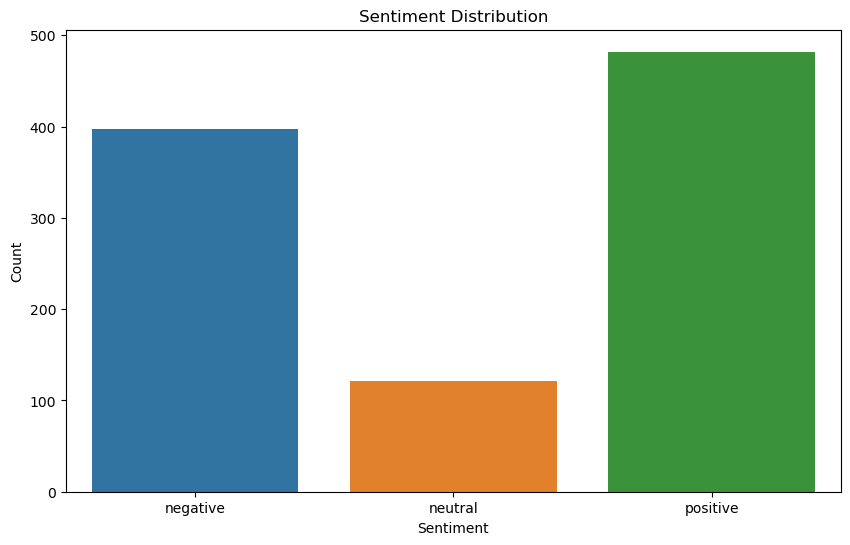

In [5]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load dataset (adapt this path to your local environment)
data = pd.read_csv(r"D:\Desktop\Important Docs\MyCertificates\Prodigy Infotech\Task4\twitter_validation.csv")

# Display the first few rows and the columns of the dataset to understand its structure
print(data.head())
print(data.columns)

# Assuming the text column might have a different name, e.g., 'content', 'review', 'tweet', etc.
# For this example, we'll use 'content'. Replace 'content' with the correct column name.
text_column = 'Content'  # Change this to the actual text column name in your dataset

# Check if the text column exists
if text_column not in data.columns:
    raise KeyError(f"Column '{text_column}' not found in the dataset. Available columns: {list(data.columns)}")

# Initialize the VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_score(text):
    return sid.polarity_scores(text)

# Apply the function to the text data
data['sentiment_scores'] = data[text_column].apply(get_sentiment_score)

# Extract compound sentiment scores
data['compound'] = data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Classify sentiment based on compound score
data['sentiment'] = data['compound'].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))

# Display the first few rows of the modified dataset
print(data.head())

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Analyzing sentiment over time (assuming there is a 'date' column in the dataset)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    sentiment_over_time = data.groupby([data['date'].dt.date, 'sentiment']).size().unstack().fillna(0)

    plt.figure(figsize=(4, 4))
    sentiment_over_time.plot()
    plt.title('Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.show()

# Sentiment by entity (assuming there is an 'entity' column in the dataset)
if 'entity' in data.columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(x='entity', hue='sentiment', data=data)
    plt.title('Sentiment by Entity')
    plt.xlabel('Entity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Sentiment')
    plt.show()
